In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Comparison ##

(The comparison `12 < x < 20` is equivalent to `12 < x and x < 20`.)

## Comparisons with arrays

In [2]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

## Rows & Apply

In [3]:
survey = Table.read_table('welcome_survey_su23.csv')
survey.show(3)

Year,Extraversion,Number of Textees,Hours of Sleep,Handedness,Pant Leg,Sleep Position,Pets
Rising second,5,5,9,Right-handed,I don't know,On your right side,None
Rising second,5,5,8,Left-handed,Left leg in first,On your stomach,"Dog, Fish"
Rising fifth or above,7,4,7,Right-handed,Right leg in first,On your stomach,None


## Conditional Statements

In [4]:
age = 20

In [5]:
if age >= 18:
    print('You can legally vote.')

You can legally vote.


In [6]:
if age >= 21:
    print('You can legally drink.')

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [7]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

### Random Selection

In [8]:
mornings = make_array('wake up', 'sleep in')

### Appending Arrays

In [9]:
first = np.arange(4)
second = np.arange(10, 17)

### Repeated Betting ###

## `For` Statements

In [10]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [11]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [12]:
results = Table().with_column('My winnings', game_outcomes)

NameError: name 'game_outcomes' is not defined

In [ ]:
results

In [ ]:
results.group('My winnings').barh('My winnings')

### Another example: simulating heads in 100 coin tosses

In [13]:
coin = make_array('heads', 'tails')

In [14]:
sum(np.random.choice(coin, 100) == 'heads')

43

In [15]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [16]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [17]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

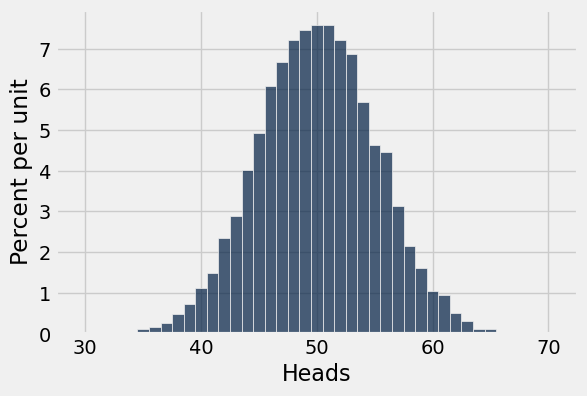

In [18]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Optional: Advanced `where` ##

In [19]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [20]:
age

Age
16
22
18
15
19
15
16
21


In [21]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [22]:
voter = ages >= 18

In [23]:
voter

array([False,  True,  True, False,  True, False, False,  True])

In [24]:
age.where(voter)

Age
22
18
19
21


In [25]:
is_voter = are.above_or_equal_to(18)

In [26]:
type(is_voter)

datascience.predicates._combinable

In [27]:
is_voter(22)

True

In [28]:
is_voter(3)

False

In [29]:
age.apply(is_voter, 'Age')

array([False,  True,  True, False,  True, False, False,  True])

In [30]:
ages >= 18

array([False,  True,  True, False,  True, False, False,  True])

In [31]:
voter

array([False,  True,  True, False,  True, False, False,  True])

In [32]:
def my_voter_function(x):
    return x >= 18

In [33]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [34]:
age.where(voter)

Age
22
18
19
21


In [35]:
age.where('Age', my_voter_function)

Age
22
18
19
21
